In [ ]:
Q#importing libs
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
X= df.iloc[:,[3,4]].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters= i,max_iter = 300, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

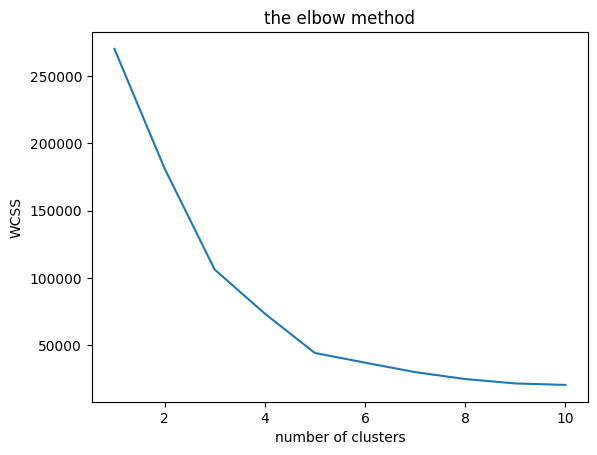

In [ ]:
plt.plot(range(1,11,1),wcss)
plt.title('the elbow method') #choose the number where the elbow starts to form
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans= KMeans(n_clusters = 5,max_iter = 300,n_init = 10, random_state = 0 )
Y_Kmeans = kmeans.fit_predict(X)


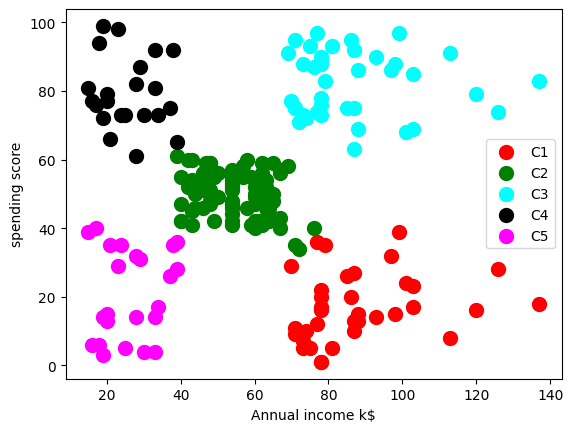

In [ ]:
plt.scatter(X[Y_Kmeans == 0,0],X[Y_Kmeans == 0,1],s=100,c='r',label ='C1' )
plt.scatter(X[Y_Kmeans == 1,0],X[Y_Kmeans == 1,1],s=100,c='g',label = 'C2' )
plt.scatter(X[Y_Kmeans == 2,0],X[Y_Kmeans == 2,1],s=100,c='cyan',label = 'C3' )
plt.scatter(X[Y_Kmeans == 3,0],X[Y_Kmeans == 3,1],s=100,c='k',label = 'C4' )
plt.scatter(X[Y_Kmeans == 4,0],X[Y_Kmeans == 4,1],s=100,c='magenta',label = 'C5' )
plt.xlabel('Annual income k$')
plt.ylabel('spending score')
plt.legend()
plt.show()